In [83]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve


# machine learning
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.pipeline import make_pipeline

# Exercise 2:
#### Consider a hospital that needs to prioritize which patients to take in. They have the following dataset of past patients that came into their ER feeling ill. This dataset includes the outcomes in the absence of further treatment as well as other information known about the patient.


#### In the past they did not have a cardiology department. However, they just received a new grant from the Ministry of Health to establish a cardiology department (as part of the government's initiative to bring AI to hospitals). Create a model that predicts whether, without treatment, a patient will die in the next six months.

In [85]:
survival_history_matrix = pd.read_csv('./features_churn_matrix_ex2.csv')
survival_history_matrix.head()

,is_male,num_prev_internations,has_genetic_marker_1,has_genetic_marker_2,age,BMI,history_family_of_heart_disease,died_within_6_months
0,False,1.0,False,True,52.0,32.0,False,False
1,True,0.0,False,False,58.0,27.0,False,True
2,True,1.0,False,True,61.0,31.0,True,False
3,True,0.0,False,True,55.0,31.0,True,False
4,True,2.0,False,True,62.0,21.0,False,False


In [86]:
y = survival_history_matrix['died_within_6_months']
X = survival_history_matrix.drop('died_within_6_months', axis=1)
df_train, df_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [87]:
# Select the model below
clf = RandomForestClassifier()
# clf = LogisticRegression()
# clf = KNeighborsClassifier(n_neighbors = 7)
# clf = GradientBoostingClassifier(learning_rate=0.1,max_depth=5,n_estimators=20)

# Create a list of the feature column's names
clf.fit(df_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## 2A: What's the accuracy and average precision of your model?

In [88]:
score = clf.score(df_test, y_test)
print("Predicted accurately %.2f%% of results" % (100*score))

Predicted accurately 84.23% of results


In [89]:
y_pred = clf.predict(df_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

      False       0.86      0.98      0.91     34172
       True       0.24      0.04      0.06      5828

avg / total       0.77      0.84      0.79     40000



## 2B: A week into the project, you still don't really know what the Head of Department wants from this project and exactly how it will be used. How would you describe your progress and metrics about the model to the Head of Department in 1 minute.
#### Please write down a sentence or two explaining why you picked that metric

Over 5838 people who would die without further treatment, my model was able to identify 4%, that is 230 of them accurately. That is 230 people who could have survived if we had that model running before.

In medicine, the recall of positive cases is often a metric of choice because we like to maximize the number of people we identify as requiring a treatment.

## 2C: Print the PR Curve

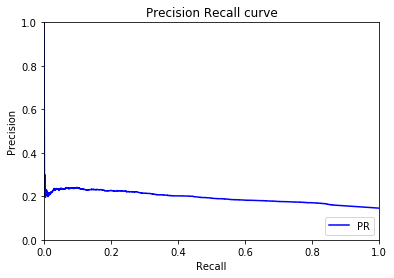

In [91]:
y_proba = clf.predict_proba(df_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_proba[:,1], 1)
plt.title('Precision Recall curve')
plt.plot(recall, precision, 'b', label = 'PR')
plt.plot()
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

## 2D: Your Head of Department finally clarifies, and says that your model will be used take in anyone who has over 30% chance of death in the next 6 months (The other 70% will just be schedule to have see a doctor in the near future.). How would you justify your model now? 
#### Please write down a sentence or two explaining why you picked that metric

My model is able to determine the confidence with which a prediction is made, and isolate the 30% of people with the highest risk of death.

The prediction probability allows to sort our patients according to their risk of death, and take a threshold that statistically isolates the 30% of people with the highest risk.

## 2E: A couple of months in, the Head of Department also remembers that the new grant includes a clause specifying that the contract will be cancelled if the Hospital doesn't abide by the following: "For the patients over 60 , 3% of them (the ones with least probability of death in the next six months) should not be referred to a doctor."

## How would you say that your model helps the hospital in abiding by this rule?

#### Please write down a sentence or two explaining why you picked that metric

We could filter the training test to only show the patients over 60 and find which threshold of probability yields a population of 3% less likely to die. As the clause is so strict, we could even raise the percent a bit in order to be on the safe side, to say, 4.5% or 5%.